In [1]:
import torch
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

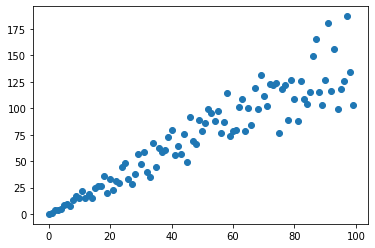

In [2]:
x_points = []
y_points = []

for i in range(100):
    x_points.append(float(i))
    y_points.append(rand.uniform(x_points[-1], 2*x_points[-1]))


plt.plot(x_points, y_points, "o")
plt.show()

In [3]:
# Split data into training and validation sets

X_train, X_test, y_train, y_test = train_test_split(x_points, y_points, test_size=0.3, random_state=42)

In [4]:
# Now that we've generated some points at random, its time to use torch 
# to execute linear regression

X_train = torch.tensor(X_train)
y_train = torch.tensor(y_train)

X_test = torch.tensor(X_test)
y_test = torch.tensor(y_test)

In [25]:
# Helper function for finding the optimal b
def grad_descent(y, b, lr=0.000001):  # Reduced learning rate
    grad = torch.autograd.grad(y, b)[0]

    return b - lr * grad, grad

# Helper function for representing the objective function
def obj_fun(b):
    # Mean squared error
    y_pred = X_train * b[1] + b[0]  # Linear regression equation with intercept and slope
    return torch.sum((y_pred - y_train) ** 2)

# Initial guess for b
b = torch.tensor([1.0, 1.0], requires_grad=True)

# Optimization loop
for i in range(100):  # Increased the number of iterations for better convergence
    loss = obj_fun(b)
    b, grad = grad_descent(loss, b)
    print(f"Iteration {i+1}: b = {b[1].item()}, intercept = {b[0].item()}, Loss = {loss.item()}")
    print(grad)

# Final result
print("Optimal b:", b[1].item(), "Optimal intercept:", b[0].item())

Iteration 1: b = 1.2149157524108887, intercept = 1.003265142440796, Loss = 68880.1015625
tensor([  -3265.0952, -214915.6875])
Iteration 2: b = 1.3273184299468994, intercept = 1.0050047636032104, Loss = 33699.0
tensor([  -1739.5962, -112402.6406])
Iteration 3: b = 1.3861056566238403, intercept = 1.0059465169906616, Loss = 24075.564453125
tensor([  -941.7431, -58787.2539])
Iteration 4: b = 1.41685152053833, intercept = 1.0064709186553955, Loss = 21443.171875
tensor([  -524.4573, -30745.8984])
Iteration 5: b = 1.4329315423965454, intercept = 1.0067771673202515, Loss = 20723.10546875
tensor([  -306.2111, -16079.9678])
Iteration 6: b = 1.4413410425186157, intercept = 1.0069692134857178, Loss = 20526.1328125
tensor([ -192.0645, -8409.4902])
Iteration 7: b = 1.4457387924194336, intercept = 1.0071015357971191, Loss = 20472.251953125
tensor([ -132.3638, -4397.7656])
Iteration 8: b = 1.4480384588241577, intercept = 1.0072026252746582, Loss = 20457.5078125
tensor([ -101.1386, -2299.6074])
Iterati

In [23]:
# Define the regression function

def regression_line(alpha, beta, x_values):

    y_pred = []

    for x in x_values:
        y_pred.append(alpha*x + beta)

    return y_pred

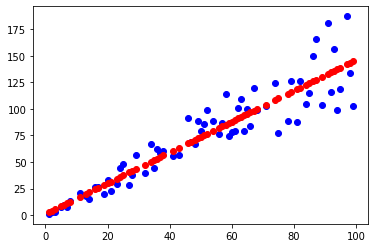

In [26]:
# Call the function and get y_pred

y_pred  = regression_line(float(b[1]), float(b[0]), X_train)

plt.plot(X_train, y_train, "o", color="blue")
plt.plot(X_train, y_pred, "o", color="red")

plt.show()

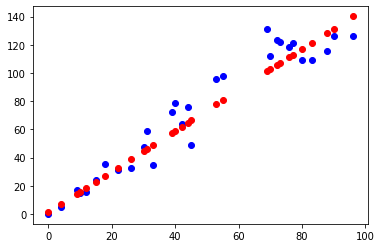

In [29]:
# Call the function and get y_pred

y_pred  = regression_line(float(b[1]), float(b[0]), X_test)

plt.plot(X_test, y_test, "o", color="blue")
plt.plot(X_test, y_pred, "o", color="red")

plt.show()

In [30]:
# Lets calculate the mean squared error

def MSE(y_pred, y_true):

    residuals = 0

    for i in range(len(y_pred)):
        residuals += (y_pred[i] - y_true[i])**2

    return residuals/len(y_pred)

In [31]:
MSE(y_pred, y_test)

tensor(148.5726)

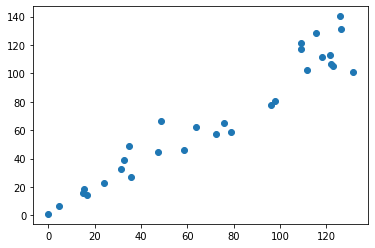

In [33]:
plt.plot(y_test, y_pred, "o")